In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow
from math import pi, sqrt, exp

In [0]:
def loadImage(image):
  img = cv2.imread(image,0)
  #cv2_imshow(img)
  #print(type(img))
  return img

In [0]:
def gaussian(n,sigma):
  limit = range(-int(n/2),int(n/2)+1)
  value = [((1 / (sigma * sqrt(2*pi))) * exp(-(float(x/sigma)**2)/2)) for x in limit]
  k = np.outer(value,value)
  #print (k)
  return k


In [0]:
def padding(arr,top,bottom,left,right):
  xlen = arr.shape[0]+2*left
  ylen = arr.shape[1]+2*top
  new = np.zeros([xlen,ylen],dtype=int)
  new[left:arr.shape[0]+left,top:arr.shape[1]+top] = arr
  new1 = np.array(new)
  #print(new1)
  #print(type(new1))
  return new1

In [0]:
def convol(arr,kernel):
  top = bottom = (kernel.shape[1] // 2)
  left = right = (kernel.shape[1] // 2)
  newImg = padding(arr,top,bottom,left,right)
  result = np.zeros_like(arr)
  offset_x,offset_y = kernel.shape[1],kernel.shape[0]
  for x in range(arr.shape[1]):
    for y in range(arr.shape[0]): 
      result[y, x]=(kernel * newImg[y: y+offset_y, x: x+offset_x]).sum()
      
      
  return result


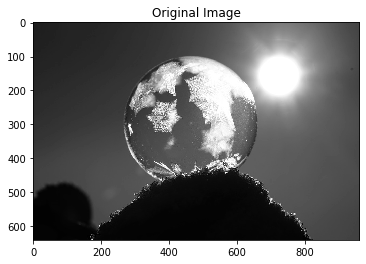

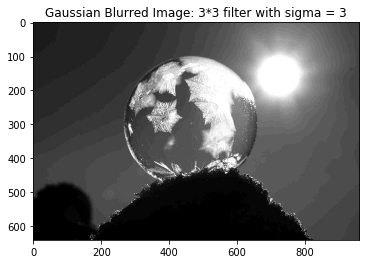

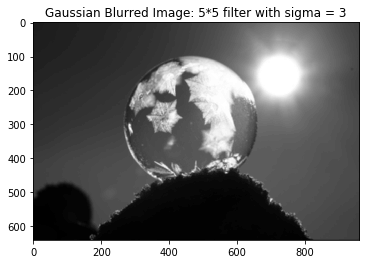

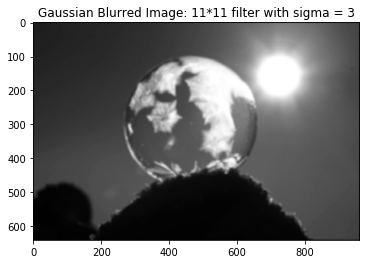

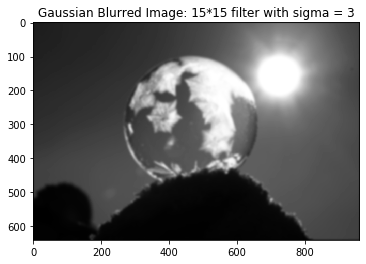

In [14]:
arr = loadImage('image_1.jpg')
plt.title('Original Image')
plt.imshow(arr, cmap='gray')
plt.show()

#vary filter size
list = [3,5,11,15]
sigma = 3
for i in list:
  kernel = gaussian(i,sigma)
  conImg = convol(arr,kernel)
  plt.title('Gaussian Blurred Image: {}*{} filter with sigma = {}'.format(i,i,sigma))
  plt.imshow(conImg, cmap='gray')
  plt.show()

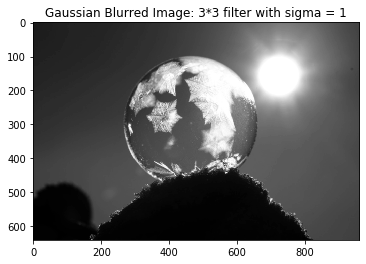

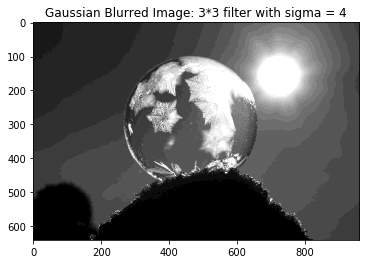

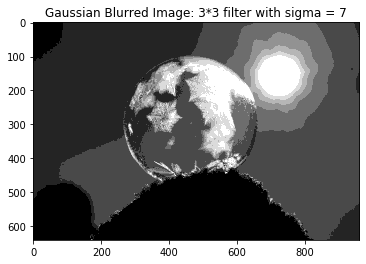

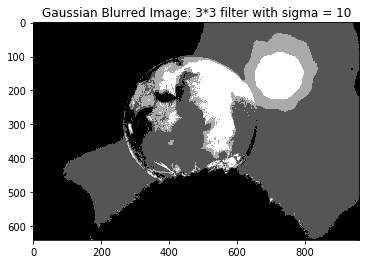

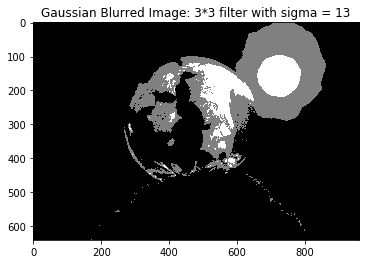

In [15]:
#Vary sigma value
fsize = 3
for sigma in range(1,15,3):
  kernel = gaussian(fsize,sigma)
  conImg = convol(arr,kernel)
  plt.title('Gaussian Blurred Image: {}*{} filter with sigma = {}'.format(fsize,fsize,sigma))
  plt.imshow(conImg, cmap='gray')
  plt.show()
